In [36]:
!pip install gensim


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [37]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [38]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [39]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group
drink = model['drink']
print(model.most_similar('drink'))

[('drinks', 0.8851481080055237), ('beer', 0.8182137608528137), ('drinking', 0.750116229057312), ('liquor', 0.7198688983917236), ('bottled', 0.7179968357086182), ('soda', 0.71770179271698), ('beverages', 0.7114107608795166), ('bottle', 0.7083660960197449), ('drank', 0.7047054767608643), ('coffee', 0.699092447757721)]


In [40]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [41]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [42]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document
food = model["pizza"]-model["italian"]
print(model.most_similar(food))
print(model.most_similar(-food))
model.most_similar(model["pasta"]+food)

[('donuts', 0.5456201434135437), ('doughnut', 0.5267532467842102), ('pizza', 0.5104662179946899), ('donut', 0.5079036355018616), ('newtie', 0.49738800525665283), ('krispy', 0.48906856775283813), ('cici', 0.48177945613861084), ('kidoodle', 0.47923535108566284), ('doughnuts', 0.4775390625), ('kfc', 0.4738330543041229)]
[('italian', 0.6664137840270996), ('portuguese', 0.6446694135665894), ('spanish', 0.6162312030792236), ('brazilian', 0.569633960723877), ('romanian', 0.5605770349502563), ('italy', 0.5501148104667664), ('argentine', 0.536564826965332), ('austrian', 0.5345065593719482), ('hungarian', 0.5339453220367432), ('german', 0.5328416228294373)]


[('pasta', 0.7543109655380249),
 ('pizza', 0.7464189529418945),
 ('burgers', 0.6653148531913757),
 ('sandwiches', 0.6589594483375549),
 ('pies', 0.6461141705513),
 ('chicken', 0.6437438726425171),
 ('cakes', 0.6409029364585876),
 ('sandwich', 0.6384642720222473),
 ('baked', 0.6376014947891235),
 ('pizzas', 0.6372991800308228)]

Part 2: Visualization and Embeddings in Space

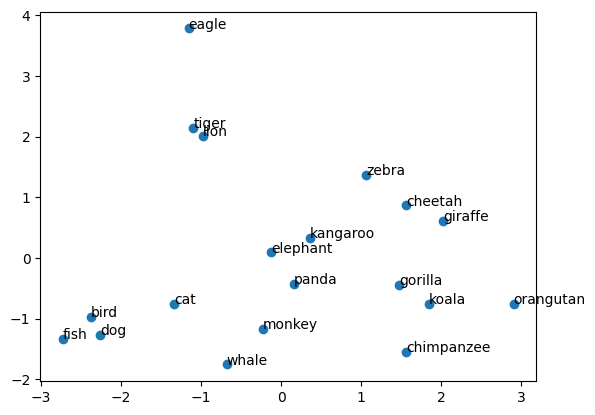

In [43]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

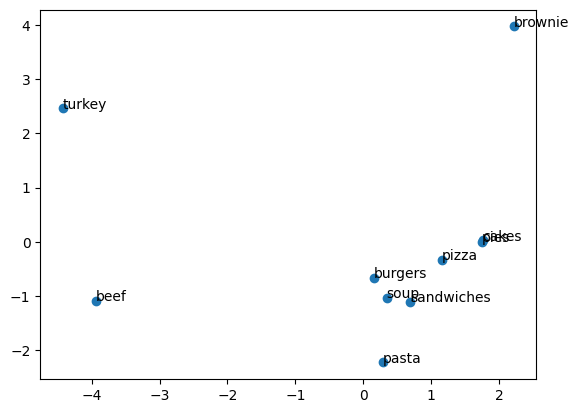

In [44]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=['pasta', 'pizza', 'burgers', 'sandwiches', 'pies', 'cakes', 'turkey', 'brownie','soup', 'beef']
X=[model[word] for word in words]
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


In [45]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


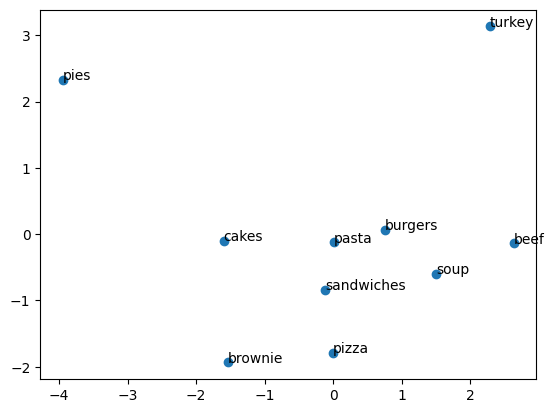

In [46]:
words=['pasta', 'pizza', 'burgers', 'sandwiches', 'pies', 'cakes', 'turkey', 'brownie','soup', 'beef']
X=[twitter_model[word] for word in words]
pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

Part 3: Embedding reddit posts

In [47]:
import pandas as pd
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [48]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text  

data['cleaned_text'] = data['text'].apply(clean)

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text']) 

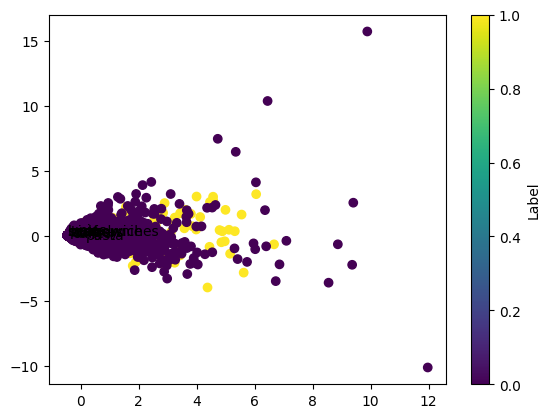

In [49]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
vectorizer = CountVectorizer(min_df=2, max_df=0.8, stop_words='english')

X = vectorizer.fit_transform(data["cleaned_text"])

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1],c=data['label'])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))
plt.colorbar(label='Label')
plt.show()
#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

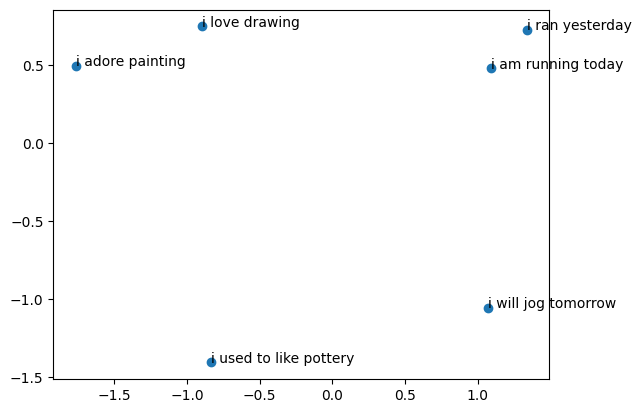

In [50]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

/var/folders/d8/1j0qh4gj0m7g_x7d8qgv_9t40000gn/T/ipykernel_51494/3021765485.py:23: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Labels", loc='upper right', labels=['Michigan', 'UIUC'])


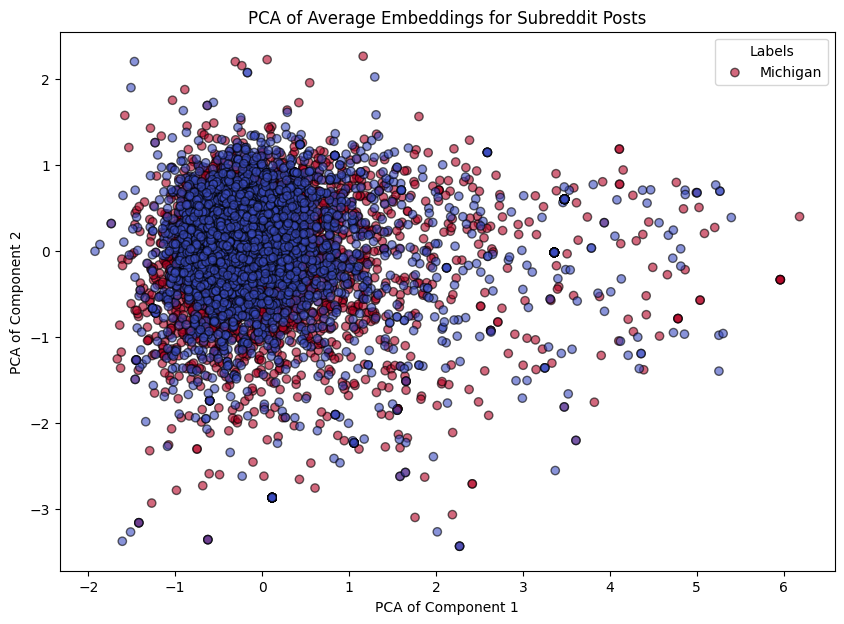

In [51]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if not embeddings:  # Check if the list is empty
        return np.zeros(model.vector_size)  # Return a zero vector of appropriate size
    return np.mean(embeddings, axis=0)
avg_embeddings = [avg_embedding(sentence, model) for sentence in data['cleaned_text']]
avg_embeddings = np.array(avg_embeddings)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.6, edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Labels", loc='upper right', labels=['Michigan', 'UIUC'])
plt.title('PCA of Average Embeddings for Subreddit Posts')
plt.xlabel('PCA of Component 1')
plt.ylabel('PCA of Component 2')
plt.show()

Part 4: HuggingFace and BERT

In [52]:
!pip install transformers\[torch\]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [53]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

sentiment_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


In [54]:
#use the pipeline to classify the sentiment of a sentence of your choice
sentiment_model("I love running")

[{'label': 'POS', 'score': 0.98808753490448}]

In [55]:
reddit

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


In [58]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
reddit = pd.read_csv("uiuc.csv")
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english", truncation=True)
reddit['sentiment'] = reddit['text'].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])
most_common_sentiment = reddit['sentiment'].value_counts().idxmax()
most_common_sentiment

Device set to use mps:0


'NEGATIVE'

In [60]:
#look at ten sample posts and labels; do you agree with all of them? 
sentiment_model = pipeline("sentiment-analysis")
sentiments = []
for post in reddit["text"]:
    sentiments.append(sentiment_model(post[:512]))
sentiments = [sentiment[0]["label"] for sentiment in sentiments]
reddit["Sentiment"] = sentiments
sample_posts = reddit[['text', 'Sentiment']].sample(n=10, random_state=42)
sample_posts


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


,text,Sentiment
3964,"they wear neon green polos and lanyards, if yo...",NEGATIVE
2820,true i agree,POSITIVE
1741,"Last year, I was really introverted and didn't...",POSITIVE
2977,Gonna throw my hat into the ring here because ...,NEGATIVE
1498,Thank you so much!,POSITIVE
949,My electricity bill last month for my 1BD was ...,NEGATIVE
1321,You should not take any chances and go see a d...,NEGATIVE
3935,"Unrelated to carpooling, but typically if you ...",POSITIVE
1162,Someone got a good score at their SAT/GRE vocab.,POSITIVE
3098,One that may make you lose your lunch from the...,NEGATIVE


In [61]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
reddit = pd.read_csv("umich.csv")
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english", truncation=True)
reddit['sentiment'] = reddit['text'].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])
most_common_sentiment = reddit['sentiment'].value_counts().idxmax()
most_common_sentiment

Device set to use mps:0


'NEGATIVE'

In [63]:
#look at ten sample posts and labels; do you agree with all of them? 
sentiment_model = pipeline("sentiment-analysis")
sentiments = []
for post in reddit["text"]:
    sentiments.append(sentiment_model(post[:512]))
sentiments = [sentiment[0]["label"] for sentiment in sentiments]
reddit["Sentiment"] = sentiments
sample_posts = reddit[['text', 'Sentiment']].sample(n=10, random_state=42)
sample_posts

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


,text,Sentiment
6023,[https://www.michigan.gov/sos/elections/voting...,NEGATIVE
586,"Yes, and have lived in the area since, mostly ...",POSITIVE
7454,Just DM’d you!,POSITIVE
3437,Bro im not in either xD. I got a spot in the l...,NEGATIVE
5362,My first thought was someone was confused abou...,NEGATIVE
1201,I was just in two stores in Ann Arbor. They're...,NEGATIVE
7648,"Np! I hope it all works out, let me know if yo...",POSITIVE
879,"Not all events are advertised, especially if t...",NEGATIVE
5884,Well always have shark bowls,POSITIVE
8288,"It’s only over if u have no social skills, you...",NEGATIVE


In [62]:
#is the UIUC or Michigan subreddit more negative?

The Michigan subreddit is more negative because although both sentiments were classified as 'Negative', 6/10 sentiments were negative versus for UIUC 5/10 sentiments were negative.